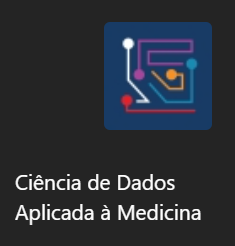

# 🖥️ Processamento de Dados: Vantagens da utilização de Linguagens de Programação

___

Autor: Nuno S. Osório
(email: nosorio@med.uminho.pt; linkedin: https://www.linkedin.com/in/nunososorio/)

Data: 21 e 22 de maio 2024

Versão Interativa: https://tinyurl.com/cienciadados2
___

# Redução de dimensionalidade



In [6]:
from IPython.display import display, HTML

# Define the iframe code
iframe_code = """
<div class="sketchfab-embed-wrapper">
    <iframe title="T" frameborder="0" allowfullscreen mozallowfullscreen="true" webkitallowfullscreen="true" allow="autoplay; fullscreen; xr-spatial-tracking" xr-spatial-tracking execution-while-out-of-viewport execution-while-not-rendered web-share src="https://sketchfab.com/models/18b6147712854200bdbc5c5424e3c0dd/embed?ui_infos=0">
    </iframe>
</div>
"""

# Display the iframe
display(HTML(iframe_code))


© Nuno S. Osório, 2024
